In [14]:
# Import BertTokenizer from Huggingface transformers module
from transformers import BertTokenizer
import string
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# insatantiate BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [3]:
# Encode a text using BERT Tokenizer
text = 'science is great'
res = tokenizer.encode(text)

for i in res:
  print(f'Token {i:>4} is {tokenizer.decode(i): <4}')

print(tokenizer.decode(res, skip_special_tokens=True))
print(tokenizer.decode(res, skip_special_tokens=False))


Token  101 is [CLS]
Token 2671 is science
Token 2003 is is  
Token 2307 is great
Token  102 is [SEP]
science is great
[CLS] science is great [SEP]


# Count the number of characters in Bert Tokeizer (letters + digits)

In [11]:
import string
digits_numbers = string.digits + string.ascii_lowercase

char_count = np.zeros(len(digits_numbers))

for idx, ch in enumerate(digits_numbers):
  char_count[idx] = np.sum([ch in tok for tok in tokenizer.vocab.keys() if not 'unused' in tok])

char_count


array([  306.,   627.,   310.,   236.,   215.,   224.,   230.,   251.,
         259.,   254., 12381.,  2874.,  6326.,  6328., 14633.,  2051.,
        4447.,  3983., 11614.,   474.,  1750.,  7553.,  4445., 10735.,
        8961.,  4005.,   275., 10991., 10206.,  9702.,  4989.,  1982.,
        1583.,   498.,  2782.,   501.])

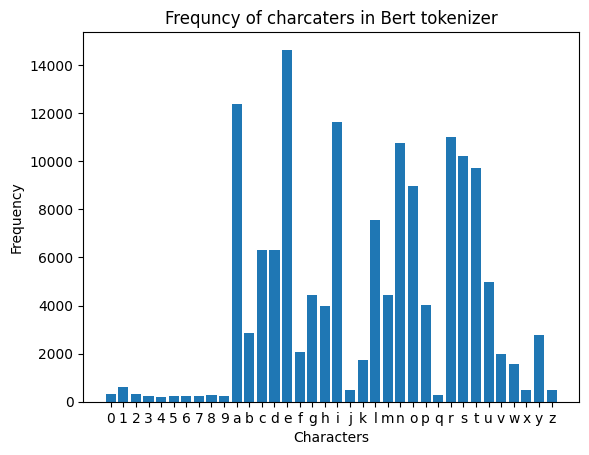

In [52]:
# Plot the frequencies of the digits and characters in the Bert tokenizer
import matplotlib.ticker as mticker

plt.bar(range(len(char_count)), height=char_count)
plt.gca().set(xticks=range(len(char_count)), xticklabels=list(digits_numbers), ylabel='Frequency', xlabel='Characters', title='Frequncy of charcaters in Bert tokenizer', yscale='linear')

plt.show();

# Count the number of occurrences of individual alphabets/ digits in Bert Tokenizer

In [53]:
char_freq = dict(zip(digits_numbers, char_count))

# Sort the dictionary items by value and convert to a list of tuples
sorted_char_freq = sorted(char_freq.items(), key=lambda item: item[1],reverse=True)

# Print the sorted list of tuples
for char, freq in sorted_char_freq:
  print(f"Character: '{char}', Occurs: {int(freq):6,} times")

Character: 'e', Occurs: 14,633 times
Character: 'a', Occurs: 12,381 times
Character: 'i', Occurs: 11,614 times
Character: 'r', Occurs: 10,991 times
Character: 'n', Occurs: 10,735 times
Character: 's', Occurs: 10,206 times
Character: 't', Occurs:  9,702 times
Character: 'o', Occurs:  8,961 times
Character: 'l', Occurs:  7,553 times
Character: 'd', Occurs:  6,328 times
Character: 'c', Occurs:  6,326 times
Character: 'u', Occurs:  4,989 times
Character: 'g', Occurs:  4,447 times
Character: 'm', Occurs:  4,445 times
Character: 'p', Occurs:  4,005 times
Character: 'h', Occurs:  3,983 times
Character: 'b', Occurs:  2,874 times
Character: 'y', Occurs:  2,782 times
Character: 'f', Occurs:  2,051 times
Character: 'v', Occurs:  1,982 times
Character: 'k', Occurs:  1,750 times
Character: 'w', Occurs:  1,583 times
Character: '1', Occurs:    627 times
Character: 'z', Occurs:    501 times
Character: 'x', Occurs:    498 times
Character: 'j', Occurs:    474 times
Character: '2', Occurs:    310 times
C

# Concert between GPT-t and BERT tokenizer

In [55]:
import tiktoken
gpt_tokenizer = tiktoken.get_encoding('o200k_harmony')

In [56]:
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [65]:
from typing import Sequence
def gpt2bert(gpt_tokenid: Sequence[int])-> Sequence[int]:
  gpt_doceded = gpt_tokenizer.decode(gpt_tokenid)
  bert_tokenid = bert_tokenizer.encode(gpt_doceded)
  return bert_tokenid

def bert2gpt(bert_tokenid: Sequence[int])-> Sequence[int]:
  bert_doceded = bert_tokenizer.decode(bert_tokenid, skip_special_tokens=True)
  gpt_tokenid = gpt_tokenizer.encode(bert_doceded)
  return gpt_tokenid


In [67]:
text = 'My name is Anirban Guha and I live in Kolkata India'
gpt_tokenid = gpt_tokenizer.encode(text)
bert_tokenid = bert_tokenizer.encode(text)
print(f'GPT-5 Token id: \t {gpt_tokenid}')
print(f'BERT Token id: \t {bert_tokenid}')
print(f'GPT-5 Token doceded: \t {gpt_tokenizer.decode(gpt_tokenid)}')
print(f'BERT Token doceded: \t {bert_tokenizer.decode(bert_tokenid, skip_special_tokens=True)}')

GPT-5 Token id: 	 [5444, 1308, 382, 1689, 380, 6893, 4993, 1716, 326, 357, 4561, 306, 115298, 8405]
BERT Token id: 	 [101, 2026, 2171, 2003, 2019, 4313, 8193, 19739, 3270, 1998, 1045, 2444, 1999, 13522, 2634, 102]
GPT-5 Token doceded: 	 My name is Anirban Guha and I live in Kolkata India
BERT Token doceded: 	 my name is anirban guha and i live in kolkata india


In [64]:
[bert_tokenizer.decode(i) for i in gpt2bert(gpt_tokenid)]

['[CLS]',
 'my',
 'name',
 'is',
 'an',
 '##ir',
 '##ban',
 'gu',
 '##ha',
 'and',
 'i',
 'live',
 'in',
 'kolkata',
 'india',
 '[SEP]']